In [1]:
import pandas as pd
import numpy as np

from sklearn import svm

import matplotlib.pyplot as plt

In [2]:
n_cls = 20   # Number of samples in each class.

np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))

X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))

y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

(40, 2) (40,)


In [3]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

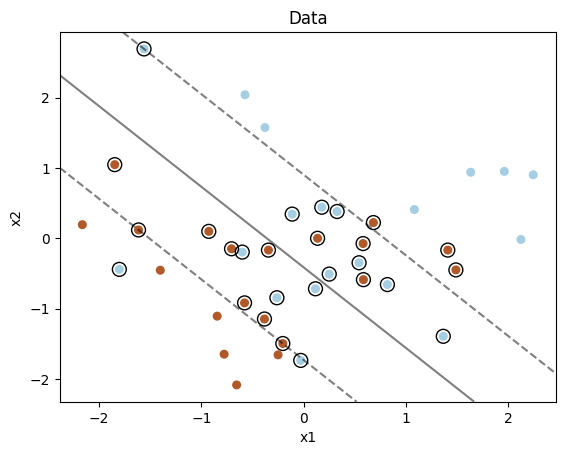

In [4]:
fig = plt.figure(1)
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

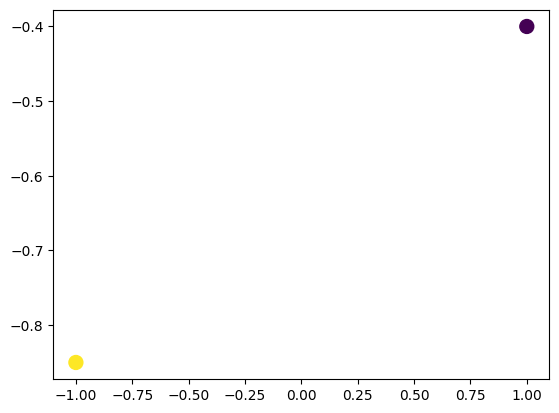

In [5]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])

y_new = clf.predict(X_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

In [6]:
# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


In [12]:
from sklearn.datasets import load_iris
iris = load_iris()


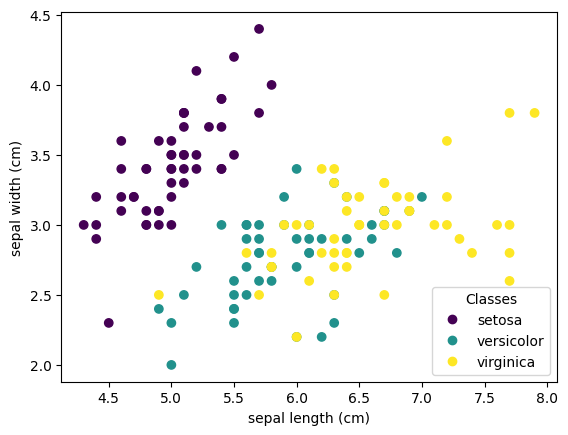

In [45]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

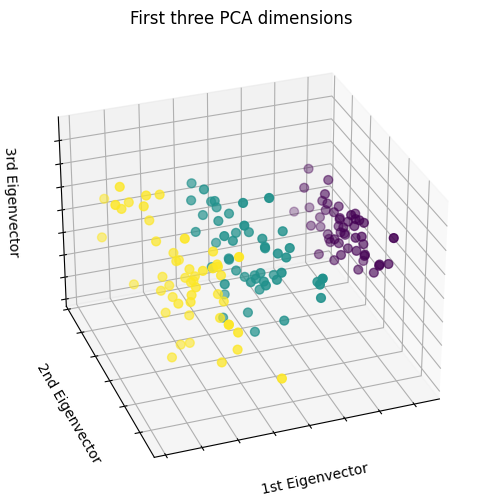

In [46]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [33]:
print(iris.data.shape)
print(iris.target_names)
X=iris.data
y=iris.target
y_setosa=[1 if y[i] == 0 else 0 for i in range(len(y))]
y_veriscolor=[1 if y[i] == 1else 0 for i in range(len(y))]
y_virginica=[1 if y[i] == 2 else 0 for i in range(len(y))]
print(iris.feature_names)
print(iris.data)

(150, 4)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3

In [28]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y_setosa)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

In [43]:
X_new = np.array([
[5.1 ,3.5 ,1.4, 0.2],
     [6.2 ,3.4, 5.4, 2.3],
 [5.5, 2.4 ,3.8 ,1.1]

    ])
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[1.85873372e-02 9.81412663e-01]
 [9.99250869e-01 7.49130544e-04]
 [9.70816555e-01 2.91834452e-02]]


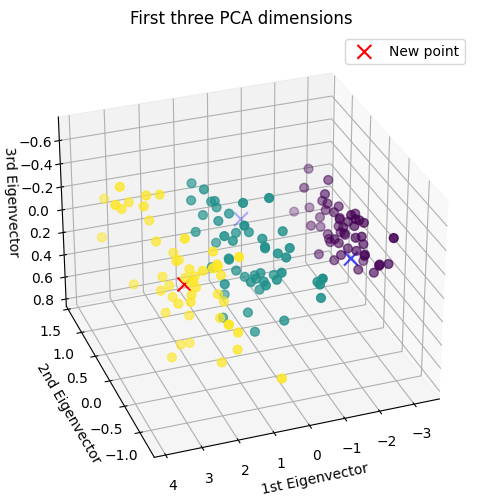

In [52]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)


# Plot points in X_new
X_new = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [6.2, 3.4, 5.4, 2.3],
    [5.5, 2.4, 3.8, 1.1]
])

# Generate class predictions probabilities
post_probs = clf.predict_proba(X_new)

# Predicted class based on probabilities
predicted_classes = np.argmax(post_probs, axis=1)

# Color points in X_new based on predicted class
colors = np.where(post_probs[:, 0] > 0.5, 'blue', 'red')

# Perform PCA for X_new
X_new_reduced = PCA(n_components=3).fit_transform(X_new)

# Scatter plot for X_new
ax.scatter(
    X_new_reduced[:, 0],
    X_new_reduced[:, 1],
    X_new_reduced[:, 2],
    c=colors,  # Color points based on predicted class probabilities
    s=100,    # Increase size for better visibility
    marker='x',  # Use 'x' marker for X_new points
    label='New point'
)

# Set labels and title
ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")

# Show legend
ax.legend()

# Show the plot
plt.show()

[[0.88488075 0.11511925]
 [0.93942586 0.06057414]
 [0.29332371 0.70667629]]


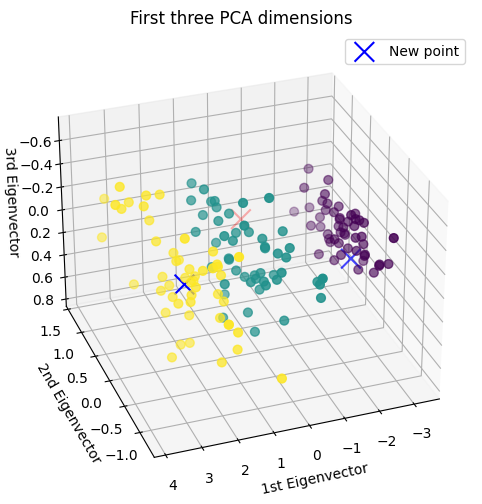

In [66]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y_veriscolor)
X_new = np.array([
[5.1 ,3.5 ,1.4, 0.2],
     [6.2 ,3.4, 5.4, 2.3],
 [5.5, 2.4 ,3.8 ,1.1]

    ])
post_probs = clf.predict_proba(X_new)
print(post_probs)


fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)


post_probs = clf.predict_proba(X_new)

predicted_classes = np.argmax(post_probs, axis=1)

colors = np.where(post_probs[:, 0] > 0.5, 'blue', 'red')

X_new_reduced = PCA(n_components=3).fit_transform(X_new)

ax.scatter(
    X_new_reduced[:, 0],
    X_new_reduced[:, 1],
    X_new_reduced[:, 2],
    c=colors,
    s=200,
    marker='x',
    label='New point'
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")

ax.legend()

plt.show()